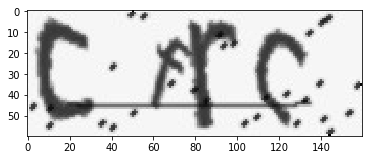

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/cfrc.jpg的识别结果为['C', 'f', 'r', 'c']


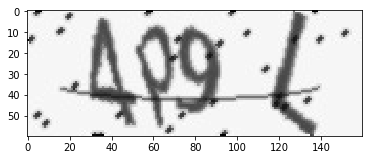

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/4p9L.jpg的识别结果为['4', 'p', '9', 'L']


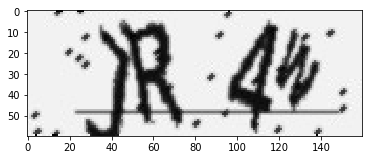

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/jR4w.jpg的识别结果为['j', 'R', '4', 'w']


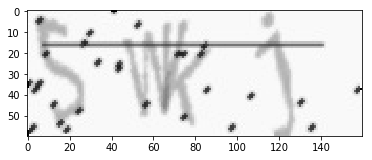

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/Swkj.jpg的识别结果为['S', 'D', 'k', 'j']


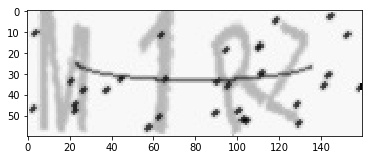

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/M1RZ.jpg的识别结果为['M', '1', 'G', 'Z']


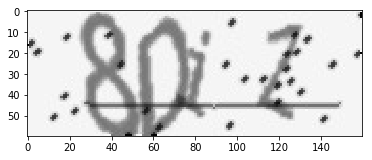

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/8DiZ.jpg的识别结果为['8', 'G', 'i', 'z']


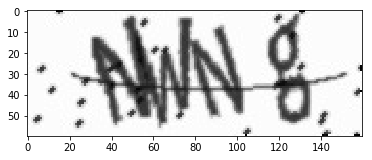

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/NWNg.jpg的识别结果为['N', 'W', 'N', 'g']


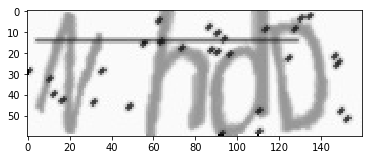

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/NhdD.jpg的识别结果为['N', 'h', 'd', 'o']


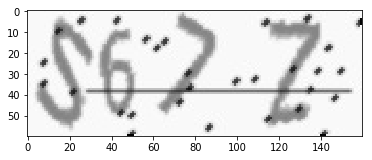

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/s67z.jpg的识别结果为['S', '6', '7', 'z']


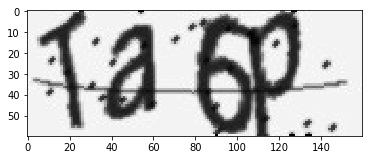

INFO:tensorflow:Restoring parameters from ./ckpt\CNN.ckpt-13000
验证码test/Ta6p.jpg的识别结果为['T', 'a', '6', 'p']


In [1]:
"""
该脚本用于在线识别一张验证码
"""
import tensorflow as tf
from ImageProcess import *
from PreProcess import Segment4_NUMBER
import random
from matplotlib import pyplot as plt
%matplotlib inline
tf.reset_default_graph()
#键为数字，值为字符
def key_and_number():
    number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
                'v', 'w', 'x', 'y', 'z']
    ALPHABET = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
                 'V', 'W', 'X', 'Y', 'Z']
    dic = {}
    x = 0
    for i in number:
        dic[x]=i
        x+=1
    for i in alphabet:

        dic[x]=i
        x+=1
    for i in ALPHABET:
        dic[x]=i
        x+=1
    return dic
dic_b = key_and_number()
# print (dic_b[16])
def CNN_Identify(numbers):
    with tf.Session() as sess:
        # 初始化变量
        init = (tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init)
        # 恢复模型
        meta_graph = tf.train.import_meta_graph('./ckpt/CNN.ckpt-13000.meta')  # 加载模型
        meta_graph.restore(sess, tf.train.latest_checkpoint('./ckpt'))  # 加载数据
        # 获取输入输出
        graph = tf.get_default_graph()
        x = graph.get_tensor_by_name("x:0")  # 获取输入占位符x
        drop_rate = graph.get_tensor_by_name("drop_rate:0")  # 获取输入占位符drop_rate
        DENSE2 = graph.get_tensor_by_name("DENSE2/Softmax:0")  # 获取输出DENSE2
        id = []
        for number in numbers:
            # 格式修正
            number = np.reshape(number,[-1,32,32,1]).astype(np.float32)
            # 识别
            y = sess.run(DENSE2, feed_dict={x: number, drop_rate: 0.0})
            # 记录识别结果
            id.append(dic_b[np.argmax(y)])
        return id

filePath = 'test/'
def get_filenames(datas_dir):
    
    for dir_name,j,file_name_list in os.walk(filePath):
        photo_finames =[]
        for i in file_name_list:
            path = os.path.join(datas_dir,i)
            photo_finames.append(path)
    return (photo_finames)

phto_path = get_filenames("test/")

#从测试集中随机抽取十张测试
for random_test in range(10):
    code_name = phto_path[random.randint(0,len(phto_path))]
    img_gray = cv2.imread(code_name, flags=cv2.IMREAD_GRAYSCALE) # 读取灰度图像
    plt.imshow(img_gray, cmap ='gray')
    plt.show()

    _, img_bin = cv2.threshold(img_gray, int(0.9 * 255), 255, cv2.THRESH_BINARY_INV) # 二值化（0.9）
    numbers = Segment4_NUMBER(img_bin)# 分割数字
    ##(2)识别
    ID = CNN_Identify(numbers)
    print('验证码%s的识别结果为%s'%(code_name,ID))
